**Intern'spedia Mid Year Project Boot Camp**

**Machine Learning Internship**

**Author : Abdulrahman Khalid**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#!pip install easygui
import easygui #to open the filebox
import imageio #to read image stored at particular path
import sys

**Load Image**

In [2]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.title("Original")
  plt.show()
  return img

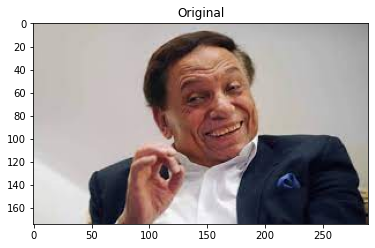

In [3]:
img = read_file("C:\\Users\\Public\\cartoon\\test1.jpg")
org_img = np.copy(img)

**Create Edge Mask**

In [15]:
# input image ---> output : edges of image
def edge_mask(img , line_size , blur_value):
    
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    plt.title("Grayscaled")
    plt.imshow(gray , cmap='gray')
    plt.show()
    
    gray_blur = cv2.medianBlur(gray , blur_value)
    plt.imshow(gray_blur , cmap='gray')
    plt.title("Smoothing")
    plt.show()
    edges = cv2.adaptiveThreshold(gray_blur ,255, cv2.ADAPTIVE_THRESH_MEAN_C 
                                ,cv2.THRESH_BINARY , line_size , blur_value )

    plt.imshow(edges , cmap = "binary")
    plt.title("Edges")
    plt.show()
    return edges

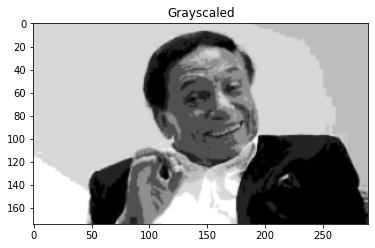

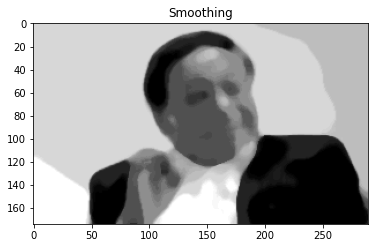

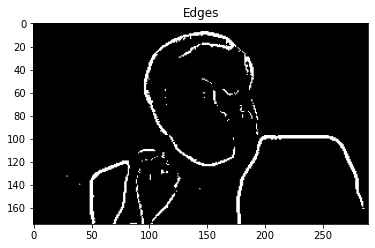

In [16]:
edges = edge_mask(img , 7 , 11 )

**Reduce Color Palette**

In [6]:
def color_quantization( img , k ):

  # Transform image : reshape
  data = np.float32(img).reshape((-1,3))

  # Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 20 , 0.001 )


  # KMeans Clustering
  ret , label , center = cv2.kmeans( data , k , None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS )
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  plt.imshow(result)
  plt.title("Reduce Color Palette")
  plt.show()

  return result


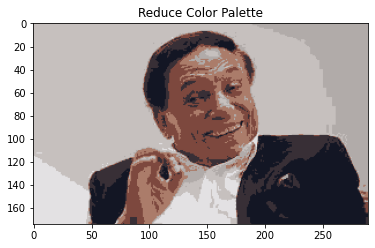

In [7]:
img = color_quantization(img , 7) 

**Reduce Noise**

In [8]:
def NoiseFilter(img):
  img =  cv2.bilateralFilter( img , d = 1 , sigmaColor = 300 , sigmaSpace = 300 )
  plt.imshow(img)
  plt.title("Noise Filter")
  plt.show()
  return img

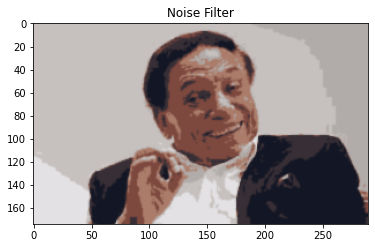

In [9]:
img = NoiseFilter(img)

**Combine Edge Mask with Quantization**

In [10]:
def Cartoon(img , edges):
  img = cv2.bitwise_and(img , img , mask = edges)

  plt.imshow(img)
  plt.title("Cartoonified")
  plt.show()

  return img

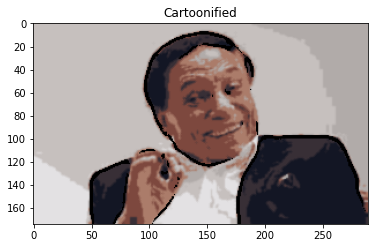

Text(0.5, 1.0, 'Original')

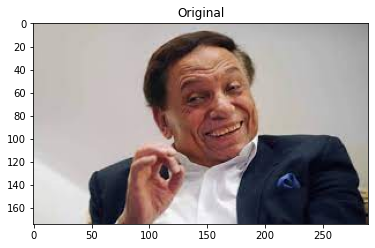

In [11]:
Cartoon(img ,edges)

plt.imshow(org_img)
plt.title("Original")

In [12]:
def Cartoonify(filepath):

  img = read_file(filepath)

  edges = edge_mask(img , 7 , 11)

  img_colored = color_quantization(img , 7)

  img_noised = NoiseFilter(img_colored)

  img_cartooned = Cartoon(img_noised,edges)
  

  #plotting images

  images=[img,edges, img_colored, img_noised, img_cartooned]
  labels = ["Original" , "Edges" , "Reduced Color Paltte" , "Noise Filter" , "Cartoonified"]
  plt.clf()
  
  fig, axes = plt.subplots(1,5, figsize=(20,30), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0, wspace=0))

  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(labels[i])
  
  plt.show()

**To Uplaod Images from files**

In [13]:
def upload():
    
    ImagePath=easygui.fileopenbox()
    
    if ImagePath is None:
        print("Can not find any image. Choose appropriate file")
        
    else:
        Cartoonify(ImagePath)

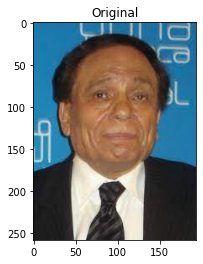

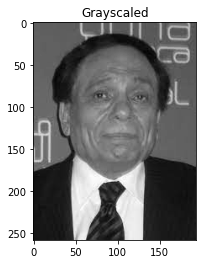

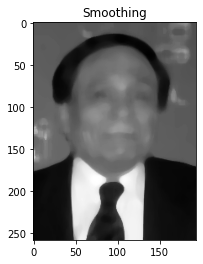

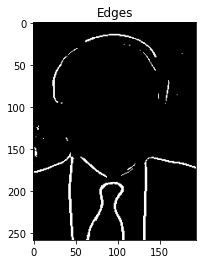

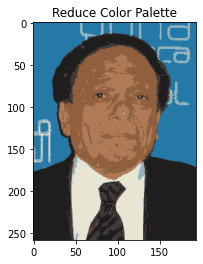

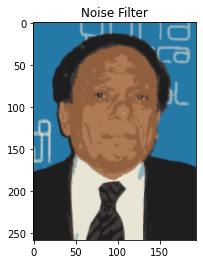

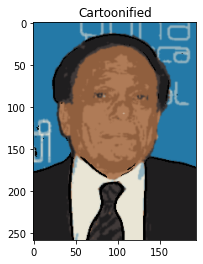

<Figure size 432x288 with 0 Axes>

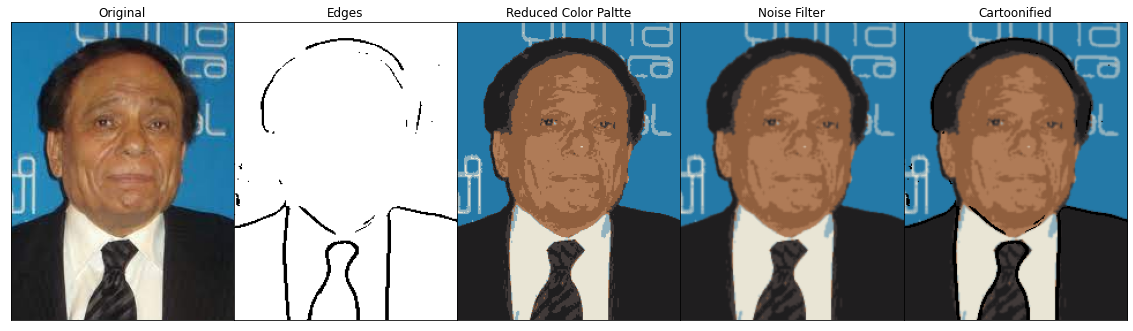

In [14]:
upload()